# 线性模型

##  0 机器学习基本概念 

监督学习: 

主要分为两种: 分类问题, 回归问题.
已学过的监督学习方法:kNN.

X : 特征.

y: 标签.(分立/连续值)

训练: 为了生成模型. (训练集)

预测: 得到一个新的数据集(测试集)中的各个样本的标签.

分类问题:

#### 回归问题:

## 1. 生成数据

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

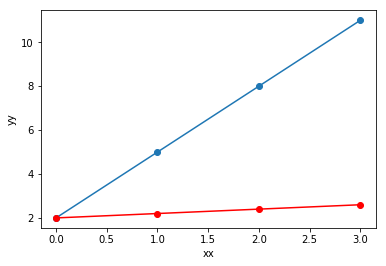

In [3]:

xx = np.array([0,1,2,3])
yy = 3 * xx + 2
yy2 = 0.2 * xx + 2
plt.xlabel("xx")
plt.ylabel("yy")
plt.plot(xx,yy,"-o")
plt.plot(xx,yy2,"-or")

100


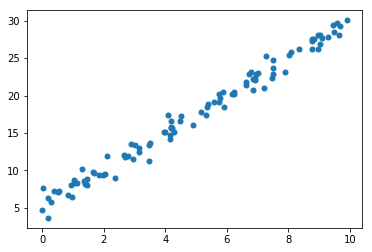

In [4]:
n = 100
beta_0 = 5 ; beta_1 = 2.5
np.random.seed(1)


x = 10 * ss.uniform.rvs(size=n)
print(x.size)

y = beta_0  + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

#作图
plt.figure()
plt.plot(x,y, "o", ms=5)


100


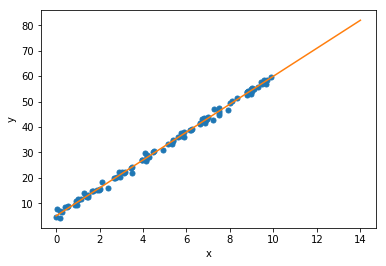

In [5]:
n = 100
beta_0 = 5 ; beta_1 = 5.5
np.random.seed(1)


x = 10 * ss.uniform.rvs(size=n)
print(x.size)

y = beta_0  + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

#作图
plt.figure()
plt.plot(x,y, "o", ms=5)
xx = np.arange(0,15)
plt.plot(xx, beta_0  + beta_1 * xx )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 2. 简单线性回归

目标: 基于一个输入X,预测一个目标值y.

$Y = \beta_0 + \beta_1 * X + err$

err: 误差

训练出一个模型以后,

$\hat y = \hat \beta_0 + \hat \beta_1 * x.$ (响应)

数据点: 

$(x_1,y_1), ...(x_p, y_p)$

RSS: 

$\sum_i^p (\hat y - y_i)^2$

TSS: 

$\sum_i^p (\hat y - \bar y)^2$

拟合优度:

$R^2 = (TSS - RSS)/TSS$


In [6]:
def estimate_y(x, b_0, b_1):
    return x * b_1 + b_0

def compute_rss(estimate_y, y):
    return sum(np.power(y-estimate_y,2))

rss = compute_rss(estimate_y(x, beta_0, beta_1),y)
rss

81.54000742551199

## 3. 最小二乘法估算(Least Square Estimation)

对于每一个数据点,分别计算RSS. 找出最小的RSS对应的系数的值.($\beta_0, \beta_1$)

假设 $\beta_0$已知.

问题: 求使得RSS最小的$\beta_1$

1550


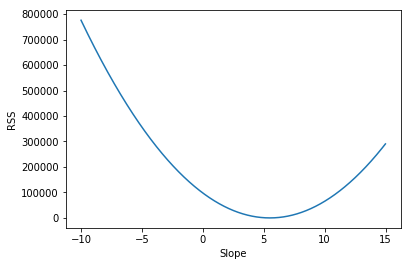

In [7]:
# 先定义rss
rss = []

# 定义可能的斜率值(beta_1的值)
slopes = np.arange(-10, 15, .01)
# 对每一个斜率值,计算rss
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2))

ind_min = np.argmin(rss)
print(ind_min)

# 作图
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS")
plt.show()

$y = 0.4 * x_1 + 0.4* x_2 + 0.2 * x_3$

## 3. 用python实现线性回归

In [8]:
import statsmodels.api as sm
mod = sm.OLS(y,x)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.532e+04
Date:                Fri, 19 Oct 2018   Prob (F-statistic):          2.39e-110
Time:                        14:12:42   Log-Likelihood:                -246.89
No. Observations:                 100   AIC:                             495.8
Df Residuals:                      99   BIC:                             498.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.2569      0.051    123.776      0.0

## 4. 多元线性模型 (多特征线性模型)

In [9]:
## 举例: 总分与各科分数之间的关系
x1 = 10
x2 = 100

y_ = 0.7 * x1 + 0.4 * x2  + 0.2 * x4 + 10
y_

57.0

## 5. 用sklearn实现线性回归

(500,)
[[4.17022005 0.8748221 ]
 [7.20324493 2.27309736]]
[14.94081271 21.35538301]


Text(0.5,0,'y')

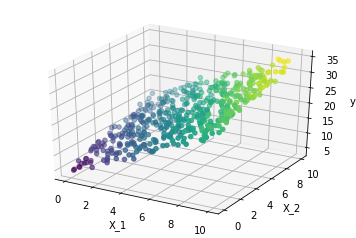

In [21]:
# 多特征线性回归 及其可视化
n = 500
beta_0 = 5 ; beta_1 = 2; beta_2 = 1
np.random.seed(1)


x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
print(x_1.shape)

# 目标值: y
y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0,scale=1,size=n)

X = np.stack([x_1,x_2],axis=1)

print(X[:2,:])
print(y[:2])
#作图
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],y, c=y)
ax.set_xlabel("X_1")
ax.set_ylabel("X_2")
ax.set_zlabel("y")

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# 训练
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# 查看截距
lm.intercept_

5.154077763777245

In [18]:
# 查看系数: (coeffients)
lm.coef_

array([1.9999379 , 0.97973551])

In [23]:
# R^2 : 拟合优度
lm.score(X,y)

0.979159222138225

## 7. 评估模型的准确度

MSE: Mean Square Error

$MSE = \frac{1}{n}\sum (y_i -\hat f(x_i))^2$

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2, random_state=2) 

# 训练模型
lm = LinearRegression()
lm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# 计算拟合优度 (决定系数) R^2
lm.score(X_test, y_test)

0.9791842342827249

In [31]:
X_test.shape


(400, 2)

In [32]:
# 给定特征(数组),预测目标值
lm.predict(X_test)

array([16.56167798, 26.92861944, 19.01391328, 17.86956625, 29.04892225,
       29.19788892, 21.91051245, 22.69725174, 25.30148126, 16.60108193,
       26.62036838, 10.66650491, 22.33774294, 31.94581178, 12.94183233,
       22.90706924, 18.23588817, 12.02181229, 13.98129371, 21.36913409,
       14.02218221, 25.21076876, 11.71516379, 19.71260956, 22.67200786,
       30.63518345, 13.4750647 , 29.14436301, 22.83387703, 29.34472015,
       18.28970501, 11.64225283, 16.36289788, 23.08467971, 23.5706606 ,
       24.6816968 , 29.89243833, 19.46848606, 30.35303862, 13.60829424,
       28.80506674, 28.71028462, 24.93576251, 18.11021326,  9.16381711,
        8.13341934,  6.03357014, 21.25843583, 16.67806412, 13.04795346,
       11.01782077, 24.22042827, 21.92920641, 18.04410907,  7.7245144 ,
       14.04003822, 34.07869663, 24.48566377, 27.15071654, 17.10357365,
       14.87295336, 26.21933033, 21.8961105 , 16.40069394, 26.95160455,
       20.82531289, 20.70812875, 22.94124538, 29.9830749 , 23.80

# 逻辑回归